# Predicting House Sale Prices using Linear Regression

## Import data

In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv('AmesHousing.tsv', sep='\t')


## Set up the structure for data analysis
### Step 1. transform features
### Step 2. select features
### Step 3. fit model and make predictions

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def transform_features(df):  
    return train
def select_features(train):
    return train[['Gr Liv Area', 'SalePrice']]
def train_and_test():
    train = housing[:1460]
    test = housing[1460:]
    target = 'SalePrice'
    train_num = train.select_dtypes(include=['int','float']).copy()
    test_num = test.select_dtypes(include=['int','float']).copy()
    train_num.drop('SalePrice', inplace=True)
    test_num.drop('SalePrice', inplace=True)
    lr = LinearRegression()
    lr.fit(select_features(train_num), train[target])
    predicted = lr.predict(select_features(test_num))
    return np.sqrt(mean_squared_error(test[target], predicted))

In [3]:
# remove any columns that have more than 25% null values 
nul_rows_threshhold = housing.shape[0] * 0.25
print(housing.isnull().sum().sort_values())
cols_null = housing.columns[housing.isnull().sum()>nul_rows_threshhold]
temp1_dropnull = housing.drop(cols_null, axis=1)
print(temp1_dropnull.info())

Order                 0
Sale Condition        0
Heating QC            0
Central Air           0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Foundation            0
TotRms AbvGrd         0
Fireplaces            0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
Functional            0
Exter Cond            0
Heating               0
                   ... 
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Electrical            1
BsmtFin SF 1          1
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Garage Cars           1
Garage Area           1
Bsmt Half Bath  

In [4]:
# select only numeric columns 
temp2_numeric = temp1_dropnull.select_dtypes(include=['int64', 'float64']).copy()
print(temp2_numeric.info())
temp2_numeric.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Mas Vnr Area       2907 non-null float64
BsmtFin SF 1       2929 non-null float64
BsmtFin SF 2       2929 non-null float64
Bsmt Unf SF        2929 non-null float64
Total Bsmt SF      2929 non-null float64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Bsmt Full Bath     2928 non-null float64
Bsmt Half Bath     2928 non-null float64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000


In [5]:
# remove columns that are not features 
cols_non_feature = ['Order', 'PID']
temp2_numeric.drop(cols_non_feature, axis=1, inplace=True)
print(temp2_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 37 columns):
MS SubClass        2930 non-null int64
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Mas Vnr Area       2907 non-null float64
BsmtFin SF 1       2929 non-null float64
BsmtFin SF 2       2929 non-null float64
Bsmt Unf SF        2929 non-null float64
Total Bsmt SF      2929 non-null float64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Bsmt Full Bath     2928 non-null float64
Bsmt Half Bath     2928 non-null float64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      2930 non-null int64
Kitchen AbvGr      2930 non-null int64
TotRms AbvGrd      

In [6]:
# drop Lot Frontage and Garage Yr Blt due to the large number of missing values and redundancy of the columns
temp2_numeric.drop(['Lot Frontage', 'Garage Yr Blt'], axis=1, inplace=True)

In [7]:
# for the rest of the numeric columns, fillin nan with average values
temp2_numeric.fillna(temp2_numeric.mean(), inplace=True)
temp2_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 35 columns):
MS SubClass        2930 non-null int64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Mas Vnr Area       2930 non-null float64
BsmtFin SF 1       2930 non-null float64
BsmtFin SF 2       2930 non-null float64
Bsmt Unf SF        2930 non-null float64
Total Bsmt SF      2930 non-null float64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Bsmt Full Bath     2930 non-null float64
Bsmt Half Bath     2930 non-null float64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      2930 non-null int64
Kitchen AbvGr      2930 non-null int64
TotRms AbvGrd      2930 non-null int64
Fireplaces         29

In [18]:
# create a new column years_until_remod
temp2_numeric['years_until_remo'] = temp2_numeric['Year Remod/Add']-temp2_numeric['Year Built']

temp2_numeric['years_until_sold'] = temp2_numeric['Yr Sold']-temp2_numeric['Year Built']
temp2_numeric.drop(['Year Remod/Add', 'Year Built', 'Yr Sold', 'Mo Sold'], axis=1, inplace=True)
temp2_numeric.head(3)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_until_remo,years_until_sold
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,210,62,0,0,0,0,0,215000,0,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,140,0,0,0,120,0,0,105000,0,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,393,36,0,0,0,0,12500,172000,0,52


In [9]:
# select only non-numeric columns 
temp3_nonnumeric = temp1_dropnull.select_dtypes(exclude=['int64', 'float64']).copy()

# remove text columns with any null values
temp3_nonnumeric.dropna(axis=1, inplace=True)
print(temp3_nonnumeric.info())
temp3_nonnumeric.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 27 columns):
MS Zoning         2930 non-null object
Street            2930 non-null object
Lot Shape         2930 non-null object
Land Contour      2930 non-null object
Utilities         2930 non-null object
Lot Config        2930 non-null object
Land Slope        2930 non-null object
Neighborhood      2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Roof Style        2930 non-null object
Roof Matl         2930 non-null object
Exterior 1st      2930 non-null object
Exterior 2nd      2930 non-null object
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Foundation        2930 non-null object
Heating           2930 non-null object
Heating QC        2930 non-null object
Central Air       2930 non-null object
Kitchen Qual      2930 non-null obj

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Fa,Y,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,Gd,Typ,Y,WD,Normal


In [10]:
temp3_nonnumeric['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [11]:
temp3_nonnumeric['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [12]:
temp3_nonnumeric['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [13]:
# transform bldg_type and neighborhood into categorical columns

temp3_nonnumeric['Neighborhood'] = temp3_nonnumeric['Neighborhood'].astype('category')
temp3_nonnumeric['Neighborhood'].cat.codes

0       15
1       15
2       15
3       15
4        8
5        8
6       25
7       25
8       25
9        8
10       8
11       8
12       8
13       8
14      25
15      25
16       8
17      25
18       8
19      17
20      17
21      17
22      24
23      15
24      15
25      15
26      15
27      15
28      15
29       2
        ..
2900    26
2901    26
2902    26
2903    14
2904    14
2905    14
2906    14
2907    14
2908    13
2909    13
2910    13
2911    14
2912    14
2913    13
2914    13
2915    14
2916    13
2917    13
2918    13
2919    13
2920    13
2921    14
2922    14
2923    14
2924    14
2925    14
2926    14
2927    14
2928    14
2929    14
Length: 2930, dtype: int8

In [19]:
# for simplicity, just add the bldg_type column to numeric columns using dummies

dummy_cols = pd.get_dummies(temp3_nonnumeric['Bldg Type'])
temp4_numeric = pd.concat([temp2_numeric, dummy_cols],axis=1)

In [20]:
temp4_numeric.head(3)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Pool Area,Misc Val,SalePrice,years_until_remo,years_until_sold,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,0,0,215000,0,50,1,0,0,0,0
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,0,0,105000,0,49,1,0,0,0,0
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,0,12500,172000,0,52,1,0,0,0,0


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# find the columns with high correlation with saleprice
print(temp4_numeric.corr()['SalePrice'].sort_values())
col_high_corr = list(temp4_numeric.corr()['SalePrice'][np.abs(temp4_numeric.corr()['SalePrice'])>0.2].index)
col_high_corr.remove('SalePrice')
print(col_high_corr)

years_until_sold   -0.558907
years_until_remo   -0.240168
Enclosed Porch     -0.128787
Kitchen AbvGr      -0.119814
Twnhs              -0.106126
Overall Cond       -0.101697
2fmCon             -0.101638
Duplex             -0.100869
MS SubClass        -0.085092
Low Qual Fin SF    -0.037660
Bsmt Half Bath     -0.035815
Misc Val           -0.015691
BsmtFin SF 2        0.005890
3Ssn Porch          0.032225
TwnhsE              0.042377
Pool Area           0.068403
1Fam                0.110180
Screen Porch        0.112151
Bedroom AbvGr       0.143913
Bsmt Unf SF         0.182805
Lot Area            0.266549
2nd Flr SF          0.269373
Bsmt Full Bath      0.275894
Half Bath           0.285056
Open Porch SF       0.312951
Wood Deck SF        0.327143
BsmtFin SF 1        0.432794
Fireplaces          0.474558
TotRms AbvGrd       0.495474
Mas Vnr Area        0.505784
Full Bath           0.545604
1st Flr SF          0.621676
Total Bsmt SF       0.632105
Garage Area         0.640385
Garage Cars   

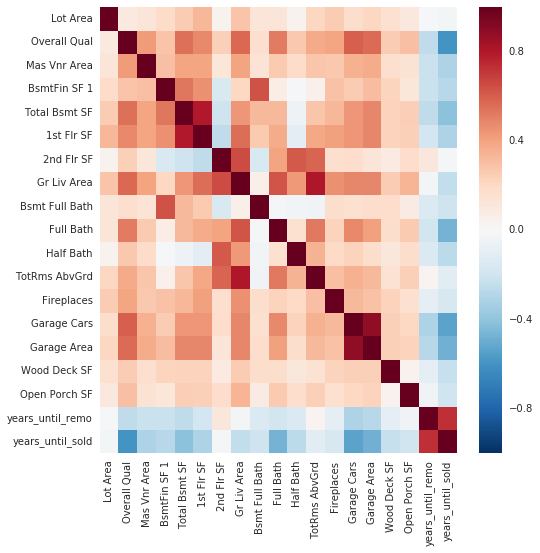

In [38]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(temp4_numeric[col_high_corr].corr())

In [44]:
col_high_corr.remove('TotRms AbvGrd')
col_high_corr.remove('Garage Area')

In [66]:
features = col_high_corr
target = 'SalePrice'
data = pd.concat([temp4_numeric[features],temp4_numeric[target]],axis=1)

from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, k=0):
    lr = LinearRegression()
    
    if k==0:
        half = int(df.shape[0]/2)
        fold_one = df.iloc[:half]
        fold_two = df.iloc[half:]
        
        lr.fit(fold_one[features], fold_one[target])
        predicted = lr.predict(fold_two[features])
        return np.sqrt(mean_squared_error(fold_two[target], predicted))
    else:
        kf = KFold(k, shuffle=True, random_state=1)
        mse = []
#       for train_idx, test_idx in kf.split(df):
#           train = df.iloc[train_idx]
#          test = df.iloc[test_idx]
#           lr.fit(train[features], train[target])
#           predicted = lr.predict(test[features])
#           mse.append(np.sqrt(mean_squared_error(test[target], predicted)))
#       return np.mean(mse)               

        mser = cross_val_score(lr, df[features], df[target], scoring='neg_mean_squared_error', cv=kf)
        return np.mean(np.sqrt(np.abs(mser)))
    

In [56]:
train_and_test(data, k=0)

41029.7891240281

In [65]:
train_and_test(data, k=5)

34579.60189443118

### The linear regression model using K-fold cross validation can predict values with an average RMSE of 34579